In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

from keras.callbacks import EarlyStopping

% matplotlib inline

Using TensorFlow backend.


In [2]:
(xtr, ytr), (xte, yte) = mnist.load_data()

In [3]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [5]:
print(ytr.shape)
ytr[:5]

(60000,)


array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
xtr = xtr.reshape(60000, -1).astype('float32') / 255
xte = xte.reshape(10000, -1).astype('float32') / 255

ytr = np.array([[1 if ytr[i] == j else 0 for j in range(10)] for i in range(len(ytr))])
yte = np.array([[1 if yte[i] == j else 0 for j in range(10)] for i in range(len(yte))])

In [7]:
print(ytr.shape)
ytr[:5, :]

(60000, 10)


array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

hist = model.fit(xtr, ytr, validation_split=0.2, epochs=40, batch_size=256, callbacks=[early_stop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 2s - loss: 0.5264 - acc: 0.8598 - val_loss: 0.2671 - val_acc: 0.9252
Epoch 2/40
48000/48000 [==============================] - 2s - loss: 0.2229 - acc: 0.9365 - val_loss: 0.1934 - val_acc: 0.9472
Epoch 3/40
48000/48000 [==============================] - 2s - loss: 0.1696 - acc: 0.9509 - val_loss: 0.1545 - val_acc: 0.9554
Epoch 4/40
48000/48000 [==============================] - 2s - loss: 0.1385 - acc: 0.9606 - val_loss: 0.1303 - val_acc: 0.9616
Epoch 5/40
48000/48000 [==============================] - 2s - loss: 0.1160 - acc: 0.9674 - val_loss: 0.1199 - val_acc: 0.9647
Epoch 6/40
48000/48000 [==============================] - 3s - loss: 0.0998 - acc: 0.9714 - val_loss: 0.1107 - val_acc: 0.9679
Epoch 7/40
48000/48000 [==============================] - 2s - loss: 0.0867 - acc: 0.9757 - val_loss: 0.1034 - val_acc: 0.9688
Epoch 8/40
48000/48000 [==============================] - 3s 

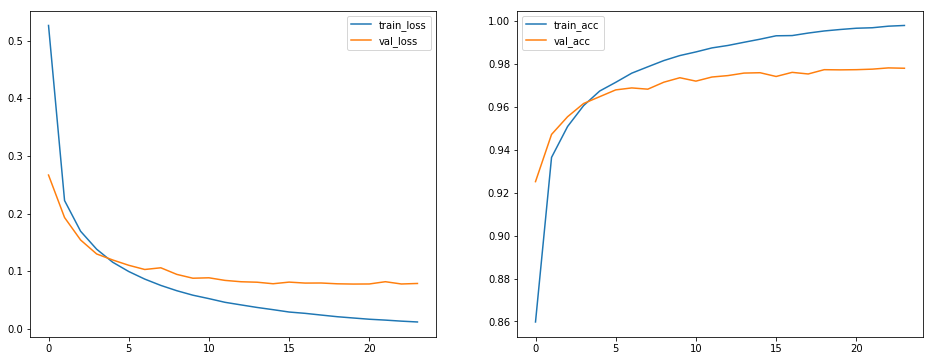

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(hist.history['loss'], label='train_loss')
ax[0].plot(hist.history['val_loss'], label='val_loss')
ax[0].legend()
ax[1].plot(hist.history['acc'], label='train_acc')
ax[1].plot(hist.history['val_acc'], label='val_acc')
ax[1].legend()

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(xte)

In [11]:
y_pred.shape

(10000, 10)

In [14]:
y_pred[0, :]

array([  1.51526294e-08,   4.03801224e-08,   3.91799222e-06,
         6.68545981e-05,   3.83435167e-12,   3.98787670e-09,
         1.28687252e-12,   9.99928355e-01,   6.00859238e-08,
         7.36047468e-07], dtype=float32)

In [12]:
accuracy_score(yte.argmax(axis=1), y_pred.argmax(axis=1))

0.97989999999999999